In [73]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [10]:
def find_maximum_time(flux):
    return 5*(0.003/flux)

X = np.empty((num_samples,2))
i = 0
while i < num_samples:
    flux = round(random.uniform(0.0005, 0.0035),5)
    time = round(random.uniform(0, 20),3)
    if time > find_maximum_time(flux):
        continue
    X[i][0] = flux
    X[i][1] = time
    i = i+1

In [11]:
X

array([[1.6100e-03, 4.8190e+00],
       [2.9000e-03, 1.3500e+00],
       [7.6000e-04, 1.1632e+01],
       [2.5800e-03, 3.9230e+00],
       [2.1800e-03, 5.9970e+00],
       [6.3000e-04, 5.6660e+00],
       [1.4800e-03, 8.1520e+00],
       [8.4000e-04, 6.7290e+00],
       [1.7000e-03, 6.2550e+00],
       [7.8000e-04, 1.6830e+01],
       [1.0600e-03, 1.1485e+01],
       [2.5700e-03, 5.3470e+00],
       [2.0600e-03, 2.1760e+00],
       [8.1000e-04, 1.1117e+01],
       [3.1100e-03, 2.4350e+00],
       [2.2300e-03, 2.2990e+00],
       [1.6100e-03, 2.9440e+00],
       [1.5900e-03, 1.5810e+00],
       [9.5000e-04, 8.9840e+00],
       [1.3400e-03, 1.0677e+01],
       [1.9300e-03, 6.5350e+00],
       [6.2000e-04, 7.9730e+00],
       [6.4000e-04, 9.9000e+00],
       [2.8800e-03, 1.6320e+00],
       [5.8000e-04, 7.4530e+00],
       [5.2000e-04, 1.7346e+01],
       [2.6300e-03, 4.6900e+00],
       [6.5000e-04, 1.0481e+01],
       [8.9000e-04, 3.7580e+00],
       [5.6000e-04, 1.5779e+01],
       [1.

In [83]:
def find_maximum_time(flux):
    return 5*(0.003/flux)

In [115]:
fluxes = []
plt.hist
X = np.empty((100))
for i in range(100):
    flux = round(random.uniform(0.0005,0.0035),5)
    fluxes.append(flux)
    times_for_this_flux =  np.linspace(0,find_maximum_time(flux),6)
    X[i] = round(times_for_this_flux[1] - times_for_this_flux[0],4)

(array([ 8., 12., 12.,  9., 13., 11.,  9., 10., 10.,  6.]),
 array([0.00054 , 0.000832, 0.001124, 0.001416, 0.001708, 0.002   ,
        0.002292, 0.002584, 0.002876, 0.003168, 0.00346 ]),
 <BarContainer object of 10 artists>)

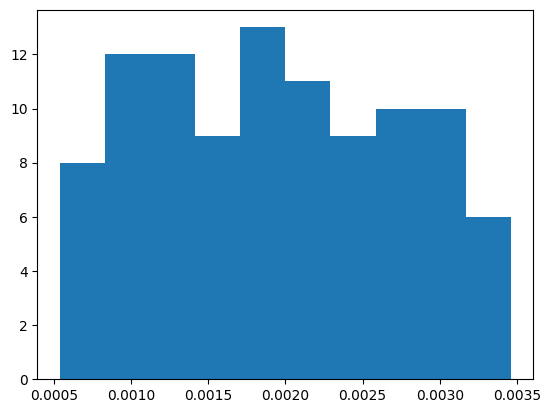

In [116]:
plt.hist(fluxes)

In [117]:
X.shape

(100,)

In [118]:
X

array([2.2556, 1.3761, 1.1364, 4.4776, 1.9108, 0.9464, 0.9804, 1.0309,
       1.4286, 1.5873, 0.9934, 1.3393, 2.6087, 1.7964, 1.1952, 2.6786,
       1.0601, 1.9608, 1.3575, 3.7037, 1.4634, 1.1719, 1.5707, 1.2146,
       1.1494, 1.0638, 1.3514, 2.7027, 0.9804, 2.027 , 1.0135, 1.5228,
       1.2712, 2.027 , 1.    , 1.7241, 5.5556, 3.1915, 3.1579, 1.2931,
       2.0548, 2.6549, 0.8955, 1.4423, 4.918 , 1.1194, 4.3478, 1.0714,
       1.0676, 1.1719, 1.3889, 1.6854, 0.9259, 1.1628, 0.9009, 1.1628,
       3.5294, 3.1579, 3.5714, 1.5707, 1.6393, 1.7964, 1.2195, 4.6154,
       3.125 , 2.1127, 1.0417, 1.3953, 0.9091, 1.0239, 1.7241, 3.2258,
       1.7544, 1.145 , 1.1236, 1.4354, 2.3622, 1.7442, 2.381 , 1.9481,
       1.0638, 2.459 , 2.2059, 2.2556, 3.2609, 3.5714, 0.8671, 2.521 ,
       0.9677, 1.31  , 2.5862, 2.6786, 3.8961, 1.6484, 1.7241, 4.4776,
       1.0239, 2.5641, 2.2222, 1.6949])

In [125]:
run_files = 'stopo temp_simple.cmd\n'
sed = "sed  -e 's/Clflux/'$Clflux'/g' -e 's/etch_time1/'$etch_time1'/g' -e 's/etch_time2/'$etch_time2'/g' -e 's/etch_time3/'$etch_time3'/g' -e 's/etch_time4/'$etch_time4'/g' -e 's/etch_time5/'$etch_time5'/g' simple.cmd > temp_simple.cmd\n"
text  = ''

for i in range(100):
    
    params = ''
    params += f'etch_time1={X[i]}\n'
    params += f'etch_time2={X[i]}\n'
    params += f'etch_time3={X[i]}\n'
    params += f'etch_time4={X[i]}\n'
    params += f'etch_time5={X[i]}\n'
    params += f'ClFlux={fluxes[i]}\n'
    
    text+= f'mkdir -p Data_GAA/TDR_files/results_{fluxes[i]}\n'
    text+= 'export '
    text += params
    text += sed
    text += run_files
    

In [126]:
with open('/Users/nimitt/Documents/SRIP/SemiconductorFabricationGAA/DataGeneration/e.sh','w') as file:
    file.write(text)